<a href="https://colab.research.google.com/github/sjelodari/sjelodari.github.io/blob/master/17042021Kaggeltrain(worldpopulation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install Kaggle on colab and download the dataset**

In [1]:
#install kaggle
!pip install -q kaggle

In [ ]:
#upload kaggle config file
from google.colab import files
files.upload()

In [3]:
!mkdir -p ~/.kaggle
!chmod 600 kaggle.json
!mv kaggle.json ~/.kaggle/

In [ ]:
# Kaggle dataset managenet using API
!kaggle datasets list
!kaggle datasets download -d mohaiminul101/population-growth-annual

In [ ]:
!unzip population-growth-annual.zip

# **Import Miniconda  and numpy as well as pandas**

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [7]:
import numpy as np
import pandas as pd
!conda install -c anaconda xlrd --y
!conda update -n base -c defaults conda

Solving environment: / - \ | done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - xlrd


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.10.14 |                0         128 KB  anaconda
    certifi-2020.6.20          |           py37_0         159 KB  anaconda
    conda-4.9.0                |           py37_0         3.1 MB  anaconda
    openssl-1.1.1h             |       h7b6447c_0         3.8 MB  anaconda
    xlrd-1.2.0                 |           py37_0         186 KB  anaconda
    ------------------------------------------------------------
                                           Total:         7.3 MB

The following NEW packages will

# **Read and clean the dataset**

In [8]:
df_pgrowth = pd.read_csv('world_population_growth.csv') #first step is reading the dataset

In [9]:
df_pgrowth.head() #after importing the dataset 2 steps are necessary 1-reading the first five rows and 2- finding out the shape of the dataset

,Country Name,Country Code,Indicator Name,Indicator Code,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,Population growth (annual %),SP.POP.GROW,2.238144,1.409622,0.832453,0.592649,0.573468,0.616991,0.587373,0.568530,0.580642,0.572211,0.636273,0.670693,0.671205,0.471968,0.212898,-0.117120,-0.363781,-0.436628,-0.204858,0.193211,0.780691,1.276348,1.385741,1.015708,0.301918,-0.607943,-1.303070,-1.226909,-0.076979,1.813641,3.902018,5.440272,6.068410,5.625998,4.616675,3.517889,2.669576,2.114386,1.960558,2.055027,2.225930,2.229056,2.109354,1.757353,1.302039,0.799546,0.384052,0.134268,0.095655,0.210709,0.370125,0.502430,0.582349,0.594397,0.544892,0.507618,0.469944,0.453576,0.442122
1,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,1.898476,1.965751,2.029893,2.090248,2.147567,2.171009,2.188108,2.254572,2.384721,2.536599,2.665192,2.714523,2.659116,2.479436,2.200780,1.981420,1.747839,1.281617,0.522260,-0.407546,-1.393544,-2.219656,-2.712948,-2.695480,-2.204368,-1.706772,-1.128041,0.116017,2.136355,4.476897,6.900156,8.546120,8.790889,7.659777,5.884257,4.019468,2.636539,1.947319,2.170439,2.975053,3.902806,4.496720,4.668361,4.321539,3.682732,2.990478,2.493842,2.268277,2.397021,2.746576,3.143126,3.407587,3.494589,3.355582,3.077084,2.778317,2.548347,2.384761,2.311817
2,Angola,AGO,Population growth (annual %),SP.POP.GROW,1.393363,1.383629,1.256555,0.973962,0.617544,0.184283,-0.120653,-0.044882,0.546045,1.489917,2.521468,3.381711,3.898493,3.989233,3.810585,3.573056,3.432752,3.354068,3.374209,3.454406,3.523644,3.552889,3.567327,3.564244,3.547876,3.531696,3.514405,3.482402,3.434427,3.378481,3.324456,3.280312,3.246642,3.226144,3.216859,3.214234,3.217320,3.228941,3.249247,3.277204,3.301198,3.329257,3.378811,3.453014,3.537557,3.619575,3.680635,3.710531,3.703878,3.671462,3.634159,3.597774,3.551950,3.497493,3.438851,3.378273,3.322081,3.276134,3.242983
3,Albania,ALB,Population growth (annual %),SP.POP.GROW,3.120855,3.056731,2.953749,2.880686,2.754021,2.634564,2.630190,2.842511,2.896083,2.550851,2.422972,2.494973,2.362552,2.297214,2.301154,2.208235,2.213252,2.075742,1.989457,2.047964,2.002974,2.113272,2.120885,2.103937,2.055995,1.933221,1.997040,1.886711,2.687862,1.799086,-0.602810,-0.606435,-0.610166,-0.613881,-0.617704,-0.621511,-0.625430,-0.629334,-0.633352,-0.637357,-0.938470,-0.299877,-0.374149,-0.417931,-0.511790,-0.630911,-0.755719,-0.767343,-0.673894,-0.496462,-0.269017,-0.165151,-0.183211,-0.207047,-0.291206,-0.159880,-0.091972,-0.246732,-0.426007
4,Andorra,AND,Population growth (annual %),SP.POP.GROW,6.941532,6.692697,6.559522,6.241511,5.998800,5.750878,5.500706,5.309820,5.198287,5.147543,5.150130,5.083934,4.862724,4.461191,3.935751,3.431725,3.080122,2.905118,3.153934,3.524383,3.896261,4.213953,4.384243,4.401653,4.339443,4.208398,4.081770,4.003002,3.915665,3.854362,3.889679,3.837472,3.476101,2.759621,1.854203,0.795574,-0.051287,-0.288007,0.354831,1.572166,2.939992,3.942573,4.375449,4.098923,3.382417,2.659984,2.066338,1.414648,0.714098,-0.016577,-0.834745,-1.588730,-2.025792,-1.951470,-1.529058,-0.919470,-0.383674,0.006493,0.176454


In [10]:
df_pgrowth.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
259,Kosovo,XKX,Population growth (annual %),SP.POP.GROW,1.986474,2.857337,2.777956,2.702867,2.631731,2.564243,2.588275,2.437022,2.379042,2.323756,2.270982,2.455569,2.320290,2.342381,2.215748,2.239169,2.120221,2.076199,2.101060,1.992098,2.017641,1.914545,2.002570,2.023988,2.102811,2.059502,2.075002,2.144552,1.990115,1.897590,1.914952,1.775504,1.693651,1.615381,1.589701,1.467737,1.302793,-5.924733,-10.955149,-3.582128,0.067859,0.067931,0.067885,0.067839,0.067910,0.803200,0.803262,0.803213,0.803172,0.803249,0.859067,0.895255,0.607468,-0.294474,-1.364932,-0.596734,0.753585,0.339011,-0.157992
260,"Yemen, Rep.",YEM,Population growth (annual %),SP.POP.GROW,1.450869,1.484101,1.506678,1.515090,1.515578,1.533225,1.563083,1.578205,1.573450,1.567904,1.553747,1.580499,1.710362,1.967695,2.306469,2.665043,2.979505,3.227659,3.388530,3.487557,3.586578,3.693086,3.765484,3.802088,3.823580,3.781813,3.760312,3.884218,4.182308,4.549561,4.932935,5.164466,5.115566,4.752035,4.216184,3.660130,3.221108,2.927751,2.821994,2.842719,2.883516,2.889575,2.892683,2.881947,2.861969,2.844836,2.834913,2.824210,2.811865,2.795788,2.779988,2.757339,2.716520,2.654141,2.578072,2.498247,2.424025,2.357023,2.300580
261,South Africa,ZAF,Population growth (annual %),SP.POP.GROW,2.453268,2.486399,2.514285,2.535788,2.552486,2.563774,2.574221,2.589232,2.610672,2.633871,2.662477,2.682556,2.676699,2.638893,2.583767,2.515025,2.462097,2.454631,2.504775,2.587573,2.682267,2.748311,2.758605,2.698756,2.595542,2.469581,2.365446,2.314794,2.334697,2.393768,2.465094,2.496890,2.454951,2.320140,2.126180,1.924735,1.751689,1.603360,1.491227,1.409029,1.333293,1.263918,1.223839,1.217777,1.237753,1.263600,1.291494,1.334129,1.391533,1.455280,1.525314,1.583107,1.605752,1.583168,1.528926,1.464829,1.407741,1.357697,1.338617
262,Zambia,ZMB,Population growth (annual %),SP.POP.GROW,3.001073,2.998554,3.004536,3.022485,3.049879,3.074830,3.099731,3.136268,3.186062,3.242354,3.298774,3.345636,3.376432,3.387713,3.385612,3.372201,3.360292,3.360621,3.378067,3.401207,3.419124,3.417167,3.389966,3.332121,3.253337,3.181763,3.111422,3.011868,2.878952,2.732582,2.577119,2.451805,2.398303,2.433662,2.525600,2.637618,2.723634,2.762874,2.740057,2.679439,2.617614,2.580520,2.564828,2.577369,2.611388,2.640771,2.670265,2.726415,2.813366,2.914663,3.020291,3.102770,3.139812,3.121305,3.066875,3.003346,2.951583,2.912801,2.892373
263,Zimbabwe,ZWE,Population growth (annual %),SP.POP.GROW,3.342091,3.378041,3.395952,3.391104,3.373423,3.346808,3.328459,3.334673,3.370993,3.422547,3.486774,3.532443,3.529130,3.466893,3.373805,3.262039,3.182284,3.179115,3.270187,3.413153,3.540057,3.616270,3.658043,3.657446,3.615586,3.570093,3.493150,3.323144,3.047052,2.706522,2.354763,2.034285,1.748434,1.511831,1.314124,1.137198,0.965971,0.801959,0.641900,0.495761,0.356533,0.254425,0.233401,0.314039,0.471329,0.650311,0.822825,1.003659,1.183792,1.353893,1.536391,1.698001,1.777645,1.754692,1.663813,1.549759,1.460061,1.410783,1.419681


In [11]:
df_pgrowth.shape

(264, 63)

In [12]:
df_pgrowth.columns.to_list()
df_pgrowth.index.to_list()

print(type(df_pgrowth.columns.to_list()))
print(type(df_pgrowth.index.to_list()))

<class 'list'>
<class 'list'>


In [13]:
df_pgrowth.drop(['Country Code','Indicator Name','Indicator Code'], axis=1, inplace=True) # to have a clean and orgnized dataframe the unnessary columns have to be deleted 
df_pgrowth.head()

,Country Name,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,2.238144,1.409622,0.832453,0.592649,0.573468,0.616991,0.587373,0.568530,0.580642,0.572211,0.636273,0.670693,0.671205,0.471968,0.212898,-0.117120,-0.363781,-0.436628,-0.204858,0.193211,0.780691,1.276348,1.385741,1.015708,0.301918,-0.607943,-1.303070,-1.226909,-0.076979,1.813641,3.902018,5.440272,6.068410,5.625998,4.616675,3.517889,2.669576,2.114386,1.960558,2.055027,2.225930,2.229056,2.109354,1.757353,1.302039,0.799546,0.384052,0.134268,0.095655,0.210709,0.370125,0.502430,0.582349,0.594397,0.544892,0.507618,0.469944,0.453576,0.442122
1,Afghanistan,1.898476,1.965751,2.029893,2.090248,2.147567,2.171009,2.188108,2.254572,2.384721,2.536599,2.665192,2.714523,2.659116,2.479436,2.200780,1.981420,1.747839,1.281617,0.522260,-0.407546,-1.393544,-2.219656,-2.712948,-2.695480,-2.204368,-1.706772,-1.128041,0.116017,2.136355,4.476897,6.900156,8.546120,8.790889,7.659777,5.884257,4.019468,2.636539,1.947319,2.170439,2.975053,3.902806,4.496720,4.668361,4.321539,3.682732,2.990478,2.493842,2.268277,2.397021,2.746576,3.143126,3.407587,3.494589,3.355582,3.077084,2.778317,2.548347,2.384761,2.311817
2,Angola,1.393363,1.383629,1.256555,0.973962,0.617544,0.184283,-0.120653,-0.044882,0.546045,1.489917,2.521468,3.381711,3.898493,3.989233,3.810585,3.573056,3.432752,3.354068,3.374209,3.454406,3.523644,3.552889,3.567327,3.564244,3.547876,3.531696,3.514405,3.482402,3.434427,3.378481,3.324456,3.280312,3.246642,3.226144,3.216859,3.214234,3.217320,3.228941,3.249247,3.277204,3.301198,3.329257,3.378811,3.453014,3.537557,3.619575,3.680635,3.710531,3.703878,3.671462,3.634159,3.597774,3.551950,3.497493,3.438851,3.378273,3.322081,3.276134,3.242983
3,Albania,3.120855,3.056731,2.953749,2.880686,2.754021,2.634564,2.630190,2.842511,2.896083,2.550851,2.422972,2.494973,2.362552,2.297214,2.301154,2.208235,2.213252,2.075742,1.989457,2.047964,2.002974,2.113272,2.120885,2.103937,2.055995,1.933221,1.997040,1.886711,2.687862,1.799086,-0.602810,-0.606435,-0.610166,-0.613881,-0.617704,-0.621511,-0.625430,-0.629334,-0.633352,-0.637357,-0.938470,-0.299877,-0.374149,-0.417931,-0.511790,-0.630911,-0.755719,-0.767343,-0.673894,-0.496462,-0.269017,-0.165151,-0.183211,-0.207047,-0.291206,-0.159880,-0.091972,-0.246732,-0.426007
4,Andorra,6.941532,6.692697,6.559522,6.241511,5.998800,5.750878,5.500706,5.309820,5.198287,5.147543,5.150130,5.083934,4.862724,4.461191,3.935751,3.431725,3.080122,2.905118,3.153934,3.524383,3.896261,4.213953,4.384243,4.401653,4.339443,4.208398,4.081770,4.003002,3.915665,3.854362,3.889679,3.837472,3.476101,2.759621,1.854203,0.795574,-0.051287,-0.288007,0.354831,1.572166,2.939992,3.942573,4.375449,4.098923,3.382417,2.659984,2.066338,1.414648,0.714098,-0.016577,-0.834745,-1.588730,-2.025792,-1.951470,-1.529058,-0.919470,-0.383674,0.006493,0.176454


In [14]:
#o get the index and columns as lists
df_pgrowth.rename(columns={'Country Name':'Country'}, inplace=True)
df_pgrowth['Total'] = df_pgrowth.sum(axis=1)
df_pgrowth.head()

,Country,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,Aruba,2.238144,1.409622,0.832453,0.592649,0.573468,0.616991,0.587373,0.568530,0.580642,0.572211,0.636273,0.670693,0.671205,0.471968,0.212898,-0.117120,-0.363781,-0.436628,-0.204858,0.193211,0.780691,1.276348,1.385741,1.015708,0.301918,-0.607943,-1.303070,-1.226909,-0.076979,1.813641,3.902018,5.440272,6.068410,5.625998,4.616675,3.517889,2.669576,2.114386,1.960558,2.055027,2.225930,2.229056,2.109354,1.757353,1.302039,0.799546,0.384052,0.134268,0.095655,0.210709,0.370125,0.502430,0.582349,0.594397,0.544892,0.507618,0.469944,0.453576,0.442122,67.351314
1,Afghanistan,1.898476,1.965751,2.029893,2.090248,2.147567,2.171009,2.188108,2.254572,2.384721,2.536599,2.665192,2.714523,2.659116,2.479436,2.200780,1.981420,1.747839,1.281617,0.522260,-0.407546,-1.393544,-2.219656,-2.712948,-2.695480,-2.204368,-1.706772,-1.128041,0.116017,2.136355,4.476897,6.900156,8.546120,8.790889,7.659777,5.884257,4.019468,2.636539,1.947319,2.170439,2.975053,3.902806,4.496720,4.668361,4.321539,3.682732,2.990478,2.493842,2.268277,2.397021,2.746576,3.143126,3.407587,3.494589,3.355582,3.077084,2.778317,2.548347,2.384761,2.311817,144.179616
2,Angola,1.393363,1.383629,1.256555,0.973962,0.617544,0.184283,-0.120653,-0.044882,0.546045,1.489917,2.521468,3.381711,3.898493,3.989233,3.810585,3.573056,3.432752,3.354068,3.374209,3.454406,3.523644,3.552889,3.567327,3.564244,3.547876,3.531696,3.514405,3.482402,3.434427,3.378481,3.324456,3.280312,3.246642,3.226144,3.216859,3.214234,3.217320,3.228941,3.249247,3.277204,3.301198,3.329257,3.378811,3.453014,3.537557,3.619575,3.680635,3.710531,3.703878,3.671462,3.634159,3.597774,3.551950,3.497493,3.438851,3.378273,3.322081,3.276134,3.242983,176.374108
3,Albania,3.120855,3.056731,2.953749,2.880686,2.754021,2.634564,2.630190,2.842511,2.896083,2.550851,2.422972,2.494973,2.362552,2.297214,2.301154,2.208235,2.213252,2.075742,1.989457,2.047964,2.002974,2.113272,2.120885,2.103937,2.055995,1.933221,1.997040,1.886711,2.687862,1.799086,-0.602810,-0.606435,-0.610166,-0.613881,-0.617704,-0.621511,-0.625430,-0.629334,-0.633352,-0.637357,-0.938470,-0.299877,-0.374149,-0.417931,-0.511790,-0.630911,-0.755719,-0.767343,-0.673894,-0.496462,-0.269017,-0.165151,-0.183211,-0.207047,-0.291206,-0.159880,-0.091972,-0.246732,-0.426007,57.329988
4,Andorra,6.941532,6.692697,6.559522,6.241511,5.998800,5.750878,5.500706,5.309820,5.198287,5.147543,5.150130,5.083934,4.862724,4.461191,3.935751,3.431725,3.080122,2.905118,3.153934,3.524383,3.896261,4.213953,4.384243,4.401653,4.339443,4.208398,4.081770,4.003002,3.915665,3.854362,3.889679,3.837472,3.476101,2.759621,1.854203,0.795574,-0.051287,-0.288007,0.354831,1.572166,2.939992,3.942573,4.375449,4.098923,3.382417,2.659984,2.066338,1.414648,0.714098,-0.016577,-0.834745,-1.588730,-2.025792,-1.951470,-1.529058,-0.919470,-0.383674,0.006493,0.176454,174.957261


In [15]:
df_pgrowth.set_index('Country', inplace=True)
df_pgrowth.head(20)

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aruba,2.238144,1.409622,0.832453,0.592649,0.573468,0.616991,0.587373,0.568530,0.580642,0.572211,0.636273,0.670693,0.671205,0.471968,0.212898,-0.117120,-0.363781,-0.436628,-0.204858,0.193211,0.780691,1.276348,1.385741,1.015708,0.301918,-0.607943,-1.303070,-1.226909,-0.076979,1.813641,3.902018,5.440272,6.068410,5.625998,4.616675,3.517889,2.669576,2.114386,1.960558,2.055027,2.225930,2.229056,2.109354,1.757353,1.302039,0.799546,0.384052,0.134268,0.095655,0.210709,0.370125,0.502430,0.582349,0.594397,0.544892,0.507618,0.469944,0.453576,0.442122,67.351314
Afghanistan,1.898476,1.965751,2.029893,2.090248,2.147567,2.171009,2.188108,2.254572,2.384721,2.536599,2.665192,2.714523,2.659116,2.479436,2.200780,1.981420,1.747839,1.281617,0.522260,-0.407546,-1.393544,-2.219656,-2.712948,-2.695480,-2.204368,-1.706772,-1.128041,0.116017,2.136355,4.476897,6.900156,8.546120,8.790889,7.659777,5.884257,4.019468,2.636539,1.947319,2.170439,2.975053,3.902806,4.496720,4.668361,4.321539,3.682732,2.990478,2.493842,2.268277,2.397021,2.746576,3.143126,3.407587,3.494589,3.355582,3.077084,2.778317,2.548347,2.384761,2.311817,144.179616
Angola,1.393363,1.383629,1.256555,0.973962,0.617544,0.184283,-0.120653,-0.044882,0.546045,1.489917,2.521468,3.381711,3.898493,3.989233,3.810585,3.573056,3.432752,3.354068,3.374209,3.454406,3.523644,3.552889,3.567327,3.564244,3.547876,3.531696,3.514405,3.482402,3.434427,3.378481,3.324456,3.280312,3.246642,3.226144,3.216859,3.214234,3.217320,3.228941,3.249247,3.277204,3.301198,3.329257,3.378811,3.453014,3.537557,3.619575,3.680635,3.710531,3.703878,3.671462,3.634159,3.597774,3.551950,3.497493,3.438851,3.378273,3.322081,3.276134,3.242983,176.374108
Albania,3.120855,3.056731,2.953749,2.880686,2.754021,2.634564,2.630190,2.842511,2.896083,2.550851,2.422972,2.494973,2.362552,2.297214,2.301154,2.208235,2.213252,2.075742,1.989457,2.047964,2.002974,2.113272,2.120885,2.103937,2.055995,1.933221,1.997040,1.886711,2.687862,1.799086,-0.602810,-0.606435,-0.610166,-0.613881,-0.617704,-0.621511,-0.625430,-0.629334,-0.633352,-0.637357,-0.938470,-0.299877,-0.374149,-0.417931,-0.511790,-0.630911,-0.755719,-0.767343,-0.673894,-0.496462,-0.269017,-0.165151,-0.183211,-0.207047,-0.291206,-0.159880,-0.091972,-0.246732,-0.426007,57.329988
Andorra,6.941532,6.692697,6.559522,6.241511,5.998800,5.750878,5.500706,5.309820,5.198287,5.147543,5.150130,5.083934,4.862724,4.461191,3.935751,3.431725,3.080122,2.905118,3.153934,3.524383,3.896261,4.213953,4.384243,4.401653,4.339443,4.208398,4.081770,4.003002,3.915665,3.854362,3.889679,3.837472,3.476101,2.759621,1.854203,0.795574,-0.051287,-0.288007,0.354831,1.572166,2.939992,3.942573,4.375449,4.098923,3.382417,2.659984,2.066338,1.414648,0.714098,-0.016577,-0.834745,-1.588730,-2.025792,-1.951470,-1.529058,-0.919470,-0.383674,0.006493,0.176454,174.957261
Arab World,2.740584,2.755287,2.773671,2.797625,2.823683,2.858219,2.887821,2.892612,2.867055,2.827199,2.774625,2.743575,2.770295,2.868430,3.007230,3.150963,3.259610,3.318062,3.314086,3.267354,3.210184,3.160183,3.109876,3.063227,3.018258,2.967807,2.912173,2.858267,2.807361,3.678350,2.729944,1.846997,2.698750,2.594074,3.119942,2.328524,2.247573,2.172633,2.150242,2.152840,2.156237,2.161001,2.188472,2.241343,2.307180,2.377071,2.430732,2.453973,2.433025,2.383187,2.329922,2.281329,2.224341,2.160102,2.093418,2.019087,1.949024,1.915913,1.924693,155.555237
United Arab Emirates,8.677691,10.645322,10.980131,9.818306,8.214525,6.534230,5.942667,7.299535,10.628219,14.378728,16.820114,17.632340,17.589359,16.936112,15.952988,15.139161,14.212240,12.770151,10.902354,9.001295,7.290246,6.033095,5.320599,5.195525,5.429103,5.705707,5.8

In [16]:
#since they had no values in the period of years
df_pgrowth.drop(['Sint Maarten (Dutch part)','Serbia','West Bank and Gaza','Not classified',], axis=0, inplace=True)
df_pgrowth.shape

(260, 60)

In [17]:
years = list(map(str, range(1961,2019)))
df_pgrowth.sort_values(by='Total', ascending=False, inplace=True)
df_pgrowth.head()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
United Arab Emirates,8.677691,10.645322,10.980131,9.818306,8.214525,6.534230,5.942667,7.299535,10.628219,14.378728,16.820114,17.632340,17.589359,16.936112,15.952988,15.139161,14.212240,12.770151,10.902354,9.001295,7.290246,6.033095,5.320599,5.195525,5.429103,5.705707,5.851230,5.920221,5.884336,5.783701,5.776060,5.802967,5.692362,5.429217,5.127172,5.008337,5.076853,5.173915,5.289810,5.510422,5.241614,5.193473,6.487170,9.173909,12.020165,14.424641,15.177084,13.910249,11.044635,7.687055,4.536348,2.154163,0.614130,0.176677,0.527412,1.053281,1.339385,1.503897,1.438780,466.080412
Qatar,8.176203,8.997270,9.252386,9.056168,8.598840,8.100648,7.775299,7.701297,7.909569,8.209097,8.654405,8.877678,8.576283,7.735247,6.732722,5.563482,4.830185,5.148772,6.660365,8.615807,10.337851,11.145270,10.949802,9.834874,8.322571,6.989300,5.955744,4.957856,3.995914,3.110805,2.298699,1.636672,1.220631,1.103014,1.254520,1.754724,2.418225,2.988769,3.373963,3.780298,3.734492,4.118173,6.189525,9.978993,13.870163,16.700191,17.510948,16.475803,14.144634,11.482901,9.232393,7.574748,6.201453,5.114953,4.239996,3.397360,2.615829,2.068684,1.795285,409.047749
Kuwait,11.088145,11.541440,11.575076,11.262706,10.756451,10.284144,9.822764,9.218440,8.489994,7.743490,7.026709,6.457515,6.114842,6.013898,6.046742,6.088574,6.049953,5.930617,5.716617,5.449948,5.033384,4.637041,4.495519,4.657345,4.908786,5.441214,5.654798,4.830010,2.806635,0.122585,-3.104373,NaN,NaN,NaN,NaN,1.296496,4.999313,6.828419,6.374074,4.678994,2.804105,1.590259,1.145914,1.782026,3.118608,4.457107,5.345892,5.892758,6.028276,5.879591,5.721612,5.549849,5.165282,4.561072,3.844209,3.113104,2.476710,1.982463,1.672323,298.469468
Djibouti,5.650590,6.248269,6.596791,6.683209,6.634769,6.648399,6.712894,6.671371,6.494469,6.315861,5.905719,5.653894,6.137267,7.388343,8.857017,10.320549,11.007708,10.438050,8.723835,6.584686,4.354705,2.718897,2.190126,3.054679,4.713545,6.536155,7.618660,7.590791,6.382655,4.598380,2.747487,1.343831,0.557904,0.623924,1.280716,2.082581,2.638524,2.922689,2.827117,2.484539,2.127615,1.882137,1.685842,1.562422,1.498687,1.433524,1.361009,1.345062,1.394638,1.483821,1.591181,1.679900,1.730858,1.728785,1.687809,1.640638,1.599962,1.557874,1.515181,245.448541
Jordan,4.288446,3.695790,3.839140,4.849571,6.259235,7.661977,8.465631,8.421662,7.526346,6.225595,4.978163,4.048787,3.366740,2.997714,2.856504,2.734271,2.611767,2.652451,2.870845,3.199210,3.588016,3.924892,4.122077,4.144749,4.067260,3.897136,3.790765,3.906417,4.290754,4.783532,5.313719,5.614586,5.475797,4.850140,3.967183,3.090048,2.414943,1.949183,1.760056,1.787101,1.834569,1.901747,2.167664,2.655147,3.268279,3.843318,4.307743,4.702766,5.009055,5.204767,5.382886,5.431587,5.172912,4.583580,3.811240,3.028092,2.356016,1.792157,1.452664,238.194389


In [18]:
df_pgrowth.describe()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,259.000000,259.000000,259.000000,259.000000,259.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,260.000000
mean,2.204276,2.259066,2.331766,2.278787,2.271494,2.242177,2.233104,2.223344,2.198323,2.175483,2.182214,2.127389,2.097825,2.084582,2.055654,2.015377,1.970918,1.974808,1.993650,2.025611,2.040223,2.047722,2.037675,2.051554,2.074029,2.086432,2.092221,2.014018,1.925080,1.853586,1.749690,1.647190,1.599389,1.551542,1.514120,1.519497,1.515505,1.481516,1.441531,1.455195,1.433713,1.462928,1.486990,1.451451,1.509923,1.538144,1.529593,1.526613,1.470351,1.415100,1.343670,1.349182,1.342792,1.341212,1.308581,1.288965,1.243621,1.216227,1.215472,105.047445
std,1.336253,1.380566,1.542132,1.348957,1.328648,1.322724,1.337122,1.476327,1.396451,1.471192,1.639253,1.611007,1.686367,1.616394,1.608517,1.671219,1.770328,1.697615,1.555922,1.411948,1.437333,1.535953,1.553956,1.588945,1.858800,2.180127,2.216051,1.976070,1.616492,1.380213,1.419660,1.549046,1.624343,1.533635,1.362296,1.276772,1.316242,1.460813,1.550643,1.320262,1.316651,1.271038,1.382496,1.558012,1.582692,1.755096,1.834104,1.769288,1.588114,1.440245,1.410870,1.363553,1.372436,1.379305,1.237064,1.164628,1.143343,1.133728,1.050064,64.176511
min,-1.015528,-0.448339,-0.863162,-1.182621,-1.446392,-1.754647,-2.041036,-2.098650,-1.877550,-1.440020,-1.704010,-3.176964,-4.181183,-4.371189,-3.823915,-3.112038,-3.129595,-3.374472,-2.722686,-1.138323,-1.393544,-3.625668,-2.712948,-2.695480,-2.204368,-1.706772,-1.303070,-1.464560,-1.564563,-1.803750,-3.104373,-5.538715,-6.766223,-5.849940,-4.168689,-3.629546,-3.207518,-5.924733,-10.955149,-4.075386,-3.847671,-2.170699,-1.474533,-9.080638,-1.628401,-1.596378,-1.974326,-2.398298,-2.265635,-2.096943,-2.628656,-3.084734,-4.289118,-4.536565,-3.913350,-3.066274,-2.418018,-4.048391,-1.805226,-12.028291
25%,1.417310,1.407149,1.458451,1.505992,1.478890,1.344409,1.298640,1.306342,1.324754,1.237505,1.196729,1.149286,1.088136,1.129042,1.084518,1.028622,0.983632,0.989717,0.947491,0.976562,0.896723,0.979755,0.918346,0.896703,0.857732,0.839390,0.860643,0.784978,0.757927,0.711179,0.712999,0.687595,0.624871,0.613431,0.540776,0.655193,0.554675,0.590255,0.564518,0.610156,0.627729,0.546188,0.530306,0.572216,0.549669,0.589501,0.557733,0.591884,0.514432,0.490789,0.434736,0.479907,0.493459,0.506682,0.524094,0.525816,0.497020,0.472729,0.469447,55.775126
50%,2.162583,2.225297,2.341844,2.333207,2.333497,2.387502,2.346530,2.316236,2.305103,2.289872,2.264441,2.262340,2.203817,2.172479,2.100819,2.041758,2.006740,2.026527,2.014135,2.189102,2.182845,2.187115,2.183129,2.156298,2.092641,2.056289,2.028857,1.991967,1.977649,1.921881,1.893370,1.766089,1.717771,1.639409,1.567359,1.540881,1.507510,1.500367,1.447848,1.418643,1.419438,1.394953,1.363998,1.341187,1.329720,1.289193,1.254753,1.317202,1.241500,1.224497,1.213779,1.187929,1.183016,1.179811,1.168099,1.162528,1.188624,1.145828,1.127924,108.944949
75%,2.831257,2.850254,2.832473,2.827877,2.824372,2.809020,2.793449,2.767433,2.759078,2.733494,2.735738,2.716067,2.732657,2.731883,2.728049,2.743649,2.760058,2.806233,2.835924,2.845778,2.789015,2.802792,2.831913,2.839411,2.813787,2.846209,2.850

# **Let's Visualize!**

---



In [19]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 3.2.2


Matplotlib version:  3.2.2


# China and India vs Canada

With respect to the world population statistics, India and China are the most populated countries. 
Since Canada is a one of the most suitable contries for immagrants. Here I want to analyse and visualise the population growth in these three countries as many people from China and India immagrates to Canada all the years.

Therefore these immagrations affect the three countries population growth.

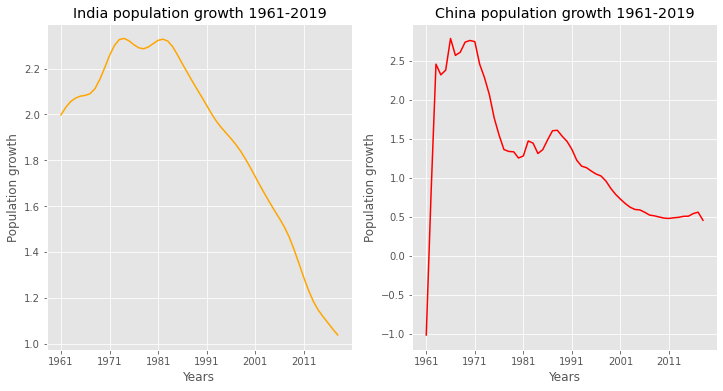

In [20]:
fig = plt.figure()
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

#suB1  India
df_india = df_pgrowth.loc['India', years]
df_india.plot(kind='line', figsize= (15,6), color='orange', ax=ax0)
ax0.set_title('India population growth 1961-2019')
ax0.set_xlabel('Years')
ax0.set_ylabel('Population growth')

#sub2 China
df_china = df_pgrowth.loc['China', years]
df_china.plot(kind='line',figsize= (12,6), color='red', ax=ax1)

plt.title('China population growth 1961-2019')
ax1.set_xlabel('Years')
ax1.set_ylabel('Population growth')


plt.show()

Text(0, 0.5, 'Population growth')

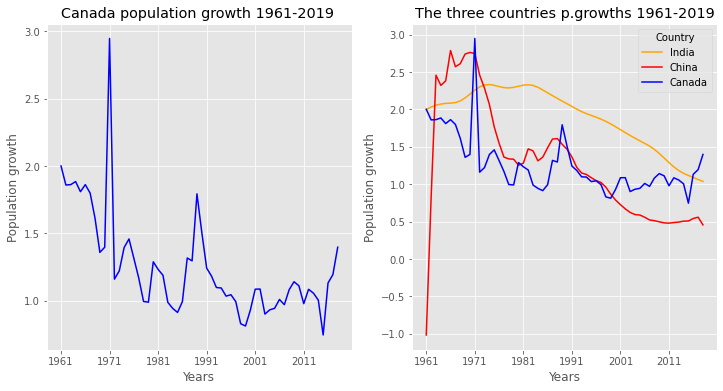

In [21]:
fig = plt.figure()
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

#sub1 Canada
df_canada = df_pgrowth.loc['Canada', years]

df_canada.plot(kind='line',figsize= (12,6),color='blue', ax=ax0)

ax0.set_title('Canada population growth 1961-2019 ')
ax0.set_xlabel('Years')
ax0.set_ylabel('Population growth')


#sub2 The three countries
colors_listt = ['orange', 'red', 'blue']
df_CIC = df_pgrowth.loc[['India','China','Canada'], years]
df_CIC = df_CIC.transpose()
df_CIC.plot(kind='line',figsize= (12,6), color= colors_listt, ax=ax1)

ax1.set_title('The three countries p.growths 1961-2019')
ax1.set_xlabel('Years')
ax1.set_ylabel('Population growth')

# The 5 Highest Population growth over the time

In [22]:
df_top5 = df_pgrowth.head(5)
# transpose the dataframe
df_top5 = df_top5[years].transpose()

In [23]:
 # I changed the index values of df_top5 to type integer for plotting
 df_top5.index= df_top5.index.map(int)

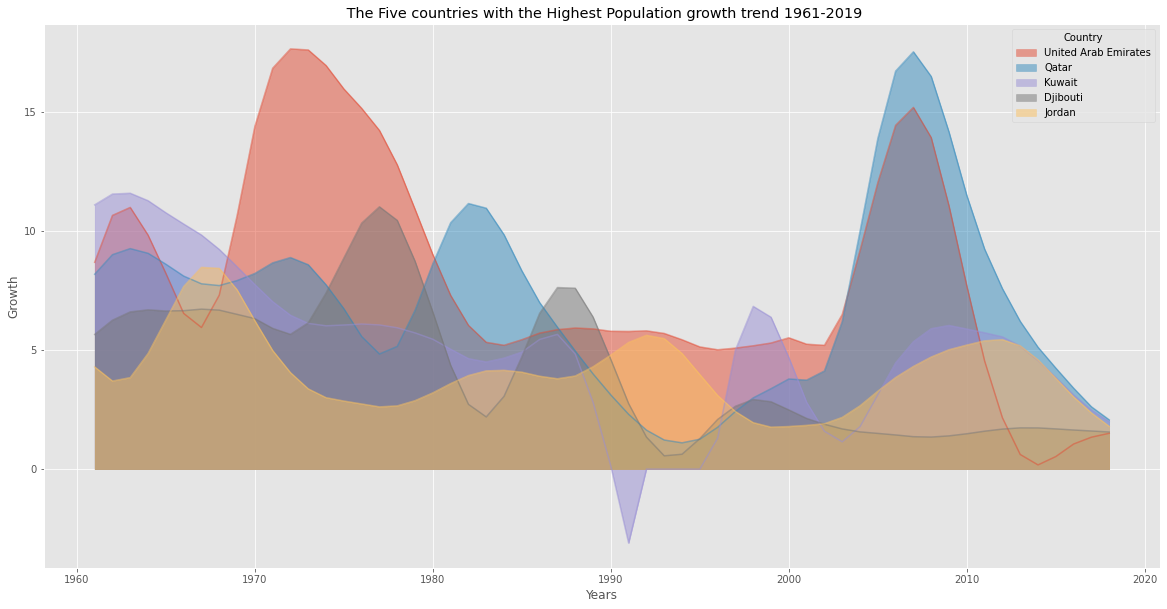

In [24]:
ax = df_top5.plot(kind='area',
             alpha=0.5,
             stacked=False,
             figsize=(20,10),
             )
ax.set_title(' The Five countries with the Highest Population growth trend 1961-2019')
ax.set_ylabel('Growth')
ax.set_xlabel('Years')
plt.show()

# The 5 lowest Population growth over the time

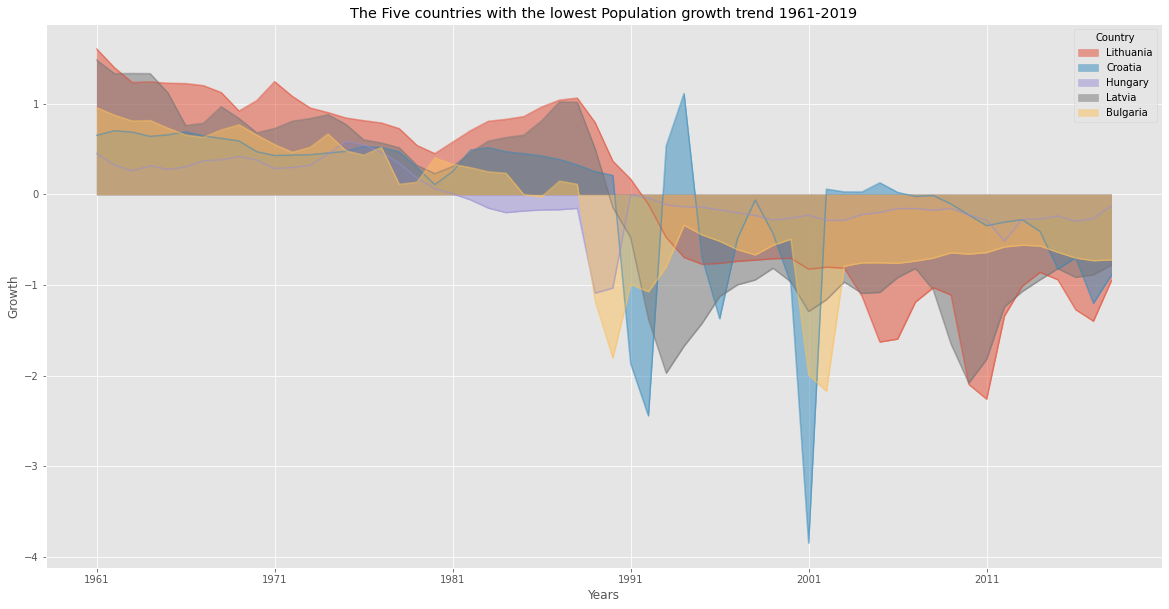

In [25]:
df_down5 = df_pgrowth.tail()
df_down5 = df_down5[years].transpose()


ax= df_down5.plot(kind='area',
                  alpha=0.50,
                  stacked = False,
                  figsize=(20,10),)

ax.set_title('The Five countries with the lowest Population growth trend 1961-2019')
ax.set_ylabel('Growth')
ax.set_xlabel('Years')

plt.show()

Text(0, 0.5, 'Population Growth')

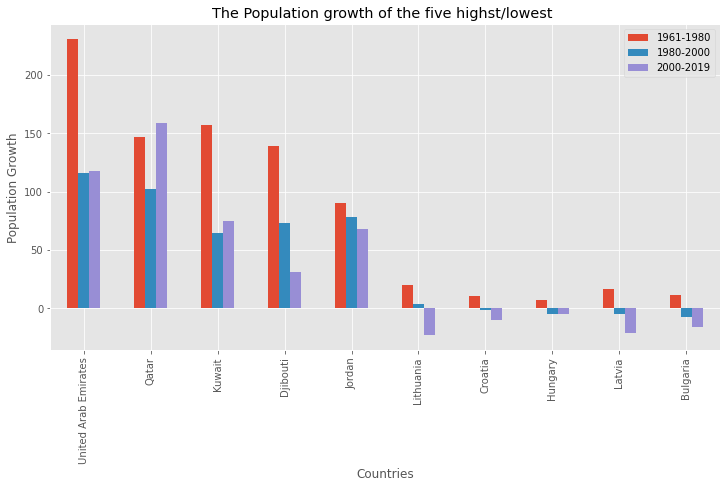

In [88]:
df_Top5 = df_pgrowth.sort_values(['Total'], ascending=False, axis=0).head(5)
# created a list of all years in three time slots
years_60s = list(map(str, range(1961, 1980))) 
years_80s = list(map(str, range(1980, 2000))) 
years_00s = list(map(str, range(2000, 2019))) 

# sliced the original dataframe df_Top5 to create a series for each slot
df_60s = df_Top5.loc[:, years_60s].sum(axis=1) 
df_80s = df_Top5.loc[:, years_80s].sum(axis=1) 
df_00s = df_Top5.loc[:, years_00s].sum(axis=1)

# merged the three series into a new data frame
new_df = pd.DataFrame({'1961-1980': df_60s, '1980-2000': df_80s, '2000-2019':df_00s}) 
df_Low5 = df_pgrowth.sort_values(['Total'], ascending=False, axis=0).tail(5)
# slice the original dataframe df_Low5 to create a series for each slot
df_L60s = df_Low5.loc[:, years_60s].sum(axis=1) 
df_L80s = df_Low5.loc[:, years_80s].sum(axis=1) 
df_L00s = df_Low5.loc[:, years_00s].sum(axis=1)

# merged the three series into a new data frame
new_ldf = pd.DataFrame({'1961-1980': df_L60s, '1980-2000': df_L80s, '2000-2019':df_L00s}) 
frames = [new_df,new_ldf]
result = pd.concat(frames)
result = pd.concat(frames, keys=["x", "y", "z"])
result = pd.concat(frames)


result.plot(kind='bar',figsize= (12,6))
plt.title('The Population growth of the five highst/lowest ')
plt.xlabel('Countries')
plt.ylabel('Population Growth')

# The effect of Iceland's Financial Crisis in the population growth trend

The 2008 - 2011 Icelandic Financial Crisis was a major economic and political event in Iceland. Relative to the size of its economy, Iceland's systemic banking collapse was the largest experienced by any country in economic history. The crisis led to a severe economic depression in 2008 - 2011 and significant political unrest.

In [89]:
ice_years = list(map(str,range(2008,2014)))
df_iceland = df_pgrowth.loc['Iceland', ice_years]
df_iceland.head()

2008    1.859572
2009    0.341242
2010   -0.143903
2011    0.305468
2012    0.532101
Name: Iceland, dtype: float64

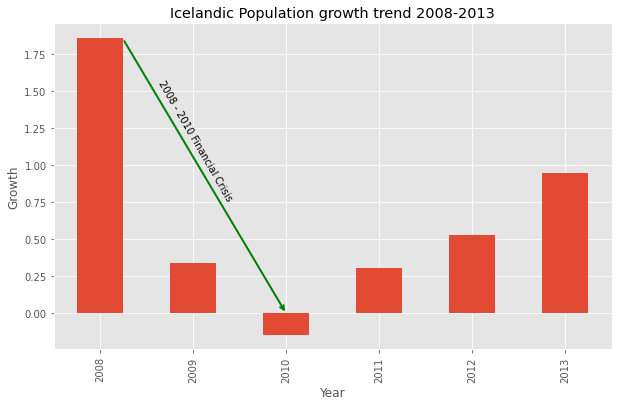

In [90]:
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year')
plt.ylabel('Growth')
plt.title('Icelandic Population growth trend 2008-2013')

# Annotate arrow
plt.annotate('',
             xy=(2, 0), 
             xytext=(0.25, 1.85),
             xycoords='data', 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='green', lw=2)
            )
#annotate text
plt.annotate('2008 - 2010 Financial Crisis',
             xy=(0.6, 0.75),                   
             rotation=-60,                  
             va='bottom',                
             ha='left',                     
            )


plt.show()

# The top 15 countries with the total growrth trend over the period

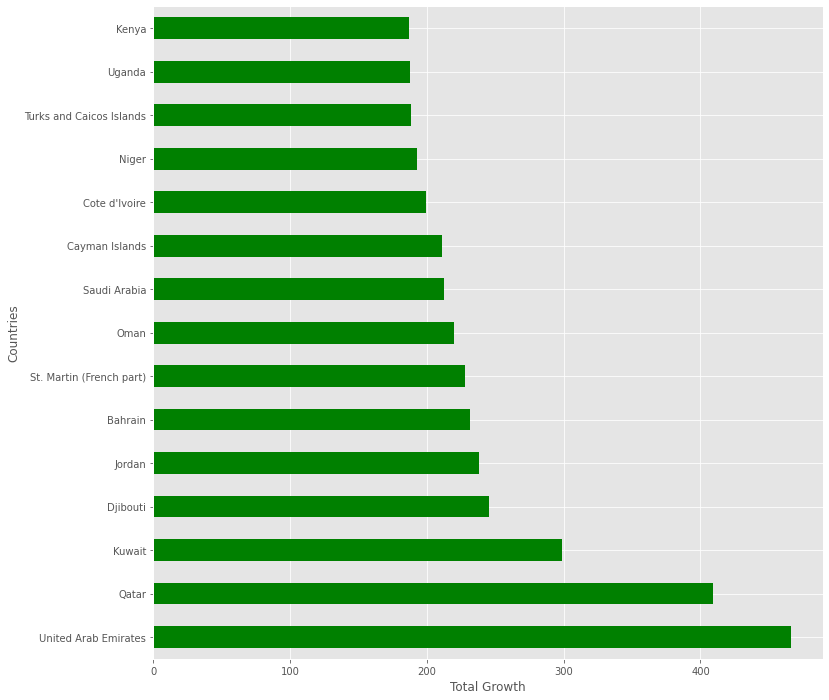

In [31]:
df_top15 = df_pgrowth['Total'].head(15)
df_top15.plot(kind='barh', figsize=(12,12), color='green')
plt.xlabel('Total Growth')
plt.ylabel('Countries')

for index, value in enumerate(df_top15): 
    label = format(int(value), ',')

plt.show()